# 🧪 Experimento con formato JPEG en Python
Este notebook muestra paso a paso cómo se crea, guarda y analiza un archivo JPEG usando librerías estándar de Python.

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import io
from skimage.io import imread

# Crear una imagen RGB artificial (gradiente)
width, height = 256, 256
x = np.linspace(0, 255, width, dtype=np.uint8)
y = np.linspace(0, 255, height, dtype=np.uint8)
r = np.tile(x, (height, 1))
g = np.tile(y, (width, 1)).T
b = 255 - r
image_array = np.dstack([r, g, b])
img = Image.fromarray(image_array, 'RGB')

/tmp/ipython-input-3054423328.py:15: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(image_array, 'RGB')


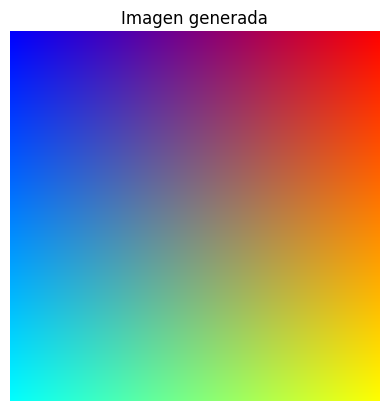

In [2]:
plt.imshow(img)
plt.title('Imagen generada')
plt.axis('off')
plt.show()

In [3]:
# !gdown 1LJHzIZfCunPcioGy_yRhpF6R4CYerfC5

In [4]:
'''
img = plt.imread('campus-san-miguel.jpeg')
if img.dtype == np.float32 or img.dtype == np.float64:
    img = (img * 255).astype(np.uint8)
if img.shape[-1] == 4:
    img = img[..., :3]
img = Image.fromarray(img).convert("RGB")
plt.imshow(img)
plt.title('Imagen original JPEG')
plt.axis('off')
plt.show()
'''

'\nimg = plt.imread(\'campus-san-miguel.jpeg\')\nif img.dtype == np.float32 or img.dtype == np.float64:\n    img = (img * 255).astype(np.uint8)\nif img.shape[-1] == 4:\n    img = img[..., :3]\nimg = Image.fromarray(img).convert("RGB")\nplt.imshow(img)\nplt.title(\'Imagen original JPEG\')\nplt.axis(\'off\')\nplt.show()\n'

## Guardar la imagen como JPEG en memoria
Aquí usaremos un buffer `BytesIO` para no crear archivos todavía.

In [5]:
buffer = io.BytesIO()
img.save(buffer, format='JPEG', quality=90)
jpeg_bytes = buffer.getvalue()
print(f"Tamaño del archivo JPEG: {len(jpeg_bytes)} bytes")

# Mostrar los primeros 32 bytes del JPEG
print(jpeg_bytes[:32])

Tamaño del archivo JPEG: 4881 bytes
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03'


## Analizar las cabeceras JPEG
JPEG comienza con los bytes **0xFFD8** (Start of Image) y termina con **0xFFD9** (End of Image).

In [6]:
start_marker = jpeg_bytes[:2]
end_marker = jpeg_bytes[-2:]
print(f'Marcador inicial: {start_marker.hex()} (debería ser FFD8)')
print(f'Marcador final: {end_marker.hex()} (debería ser FFD9)')

Marcador inicial: ffd8 (debería ser FFD8)
Marcador final: ffd9 (debería ser FFD9)


## Reconstruir la imagen JPEG desde memoria

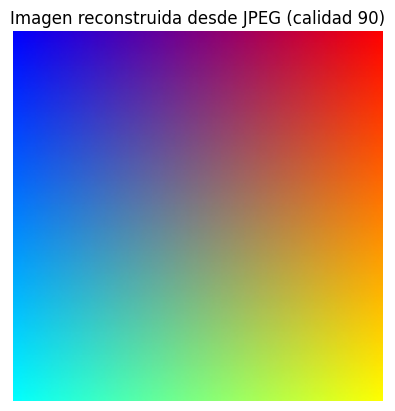

In [7]:
buffer.seek(0)
img_jpeg = Image.open(buffer)
plt.imshow(img_jpeg)
plt.title('Imagen reconstruida desde JPEG (calidad 90)')
plt.axis('off')
plt.show()

## Comparar diferentes niveles de compresión
Probemos con calidades 10, 50, 90 para ver la diferencia visual y de tamaño.

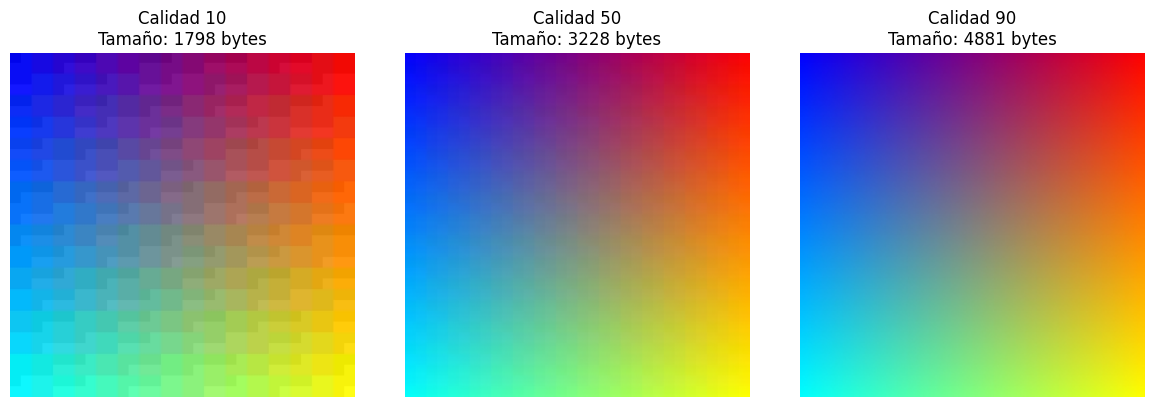

In [8]:
qualities = [10, 50, 90]
plt.figure(figsize=(12,4))

for i, q in enumerate(qualities):
    buf = io.BytesIO()
    img.save(buf, format='JPEG', quality=q)
    buf.seek(0)
    comp_img = Image.open(buf)
    plt.subplot(1, 3, i+1)
    plt.imshow(comp_img)
    plt.title(f'Calidad {q}\nTamaño: {len(buf.getvalue())} bytes')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Guardar en disco (opcional)
Finalmente, puedes guardar los archivos JPEG generados.

In [13]:
img.save('imagen_calidad_90.jpg', format='JPEG', quality=90)
print('Archivo guardado como imagen_calidad_90.jpg')

Archivo guardado como imagen_calidad_90.jpg


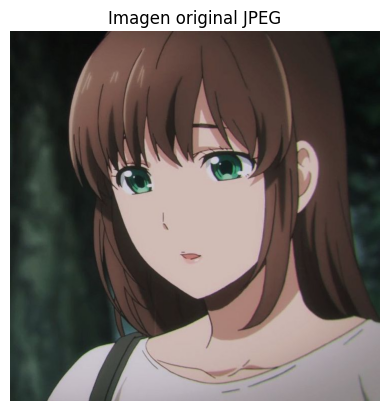

In [25]:
img = plt.imread('/content/hina_uwu.jpg')
if img.dtype == np.float32 or img.dtype == np.float64:
    img = (img * 255).astype(np.uint8)
if img.shape[-1] == 4:
    img = img[..., :3]
img = Image.fromarray(img).convert("RGB")
plt.imshow(img)
plt.title('Imagen original JPEG')
plt.axis('off')
plt.show()

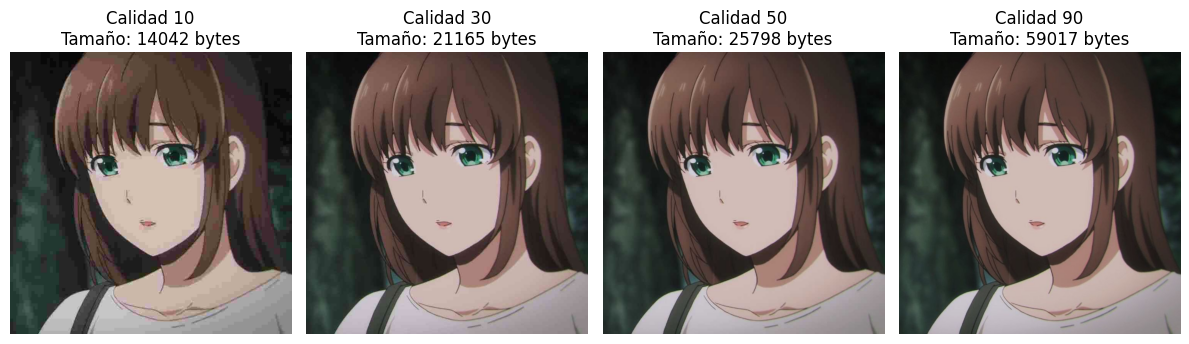

In [27]:
qualities = [10, 30, 50, 90]
plt.figure(figsize=(12,4))

for i, q in enumerate(qualities):
    buf = io.BytesIO()
    img.save(buf, format='JPEG', quality=q)
    buf.seek(0)
    comp_img = Image.open(buf)
    plt.subplot(1, 4, i+1)
    plt.imshow(comp_img)
    plt.title(f'Calidad {q}\nTamaño: {len(buf.getvalue())} bytes')
    plt.axis('off')

plt.tight_layout()
plt.show()

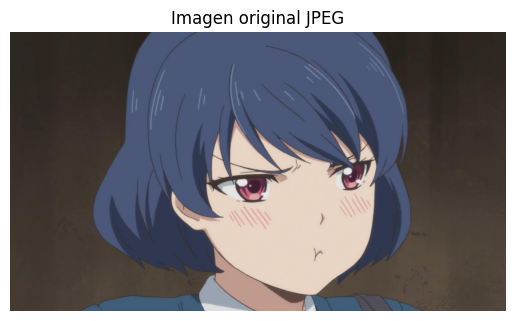

In [28]:
img = imread('/content/rui.jpg')
if img.dtype == np.float32 or img.dtype == np.float64:
    img = (img * 255).astype(np.uint8)
if img.shape[-1] == 4:
    img = img[..., :3]
img = Image.fromarray(img).convert("RGB")
plt.imshow(img)
plt.title('Imagen original JPEG')
plt.axis('off')
plt.show()


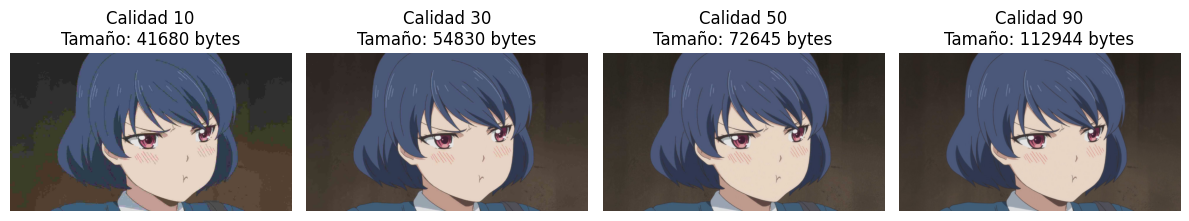

In [29]:
qualities = [10, 30, 50, 90]
plt.figure(figsize=(12,4))

for i, q in enumerate(qualities):
    buf = io.BytesIO()
    img.save(buf, format='JPEG', quality=q)
    buf.seek(0)
    comp_img = Image.open(buf)
    plt.subplot(1, 4, i+1)
    plt.imshow(comp_img)
    plt.title(f'Calidad {q}\nTamaño: {len(buf.getvalue())} bytes')
    plt.axis('off')

plt.tight_layout()
plt.show()